In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import numpy as np
from collections import OrderedDict as OD
#import uproot3
import uproot
import hist
import matplotlib.pyplot as plt
import mplhep as hep

sIpFiles = OD([
    # (<file name to refer>, <file path+name>)
    ('analyze_hadded_QCD_HT100to200.root', '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD_HT100to200/analyze_hadded_QCD_HT100to200.root')
])
sOpDir  = '/home/siddhesh/Work/CMS/htoaa/analysis/20230324_QCD_HT100to200/plots'

if not os.path.exists(sOpDir):
    os.makedirs(sOpDir)
    
fIpFiles = OD()
for sIpFileName, sIpFileNameFull in sIpFiles.items():
    fIpFiles[sIpFileName] = uproot.open(sIpFileNameFull)

plotNameNice: hLeadingPtGenBquark_pt_all
iHistoToOverlay_details: 0

sIpFileName_: analyze_hadded_QCD_HT100to200.root,  sHistogramName_: evt/QCD_bEnrich/hLeadingPtGenBquark_pt_all_central
iHistoToOverlay_details: 1

sIpFileName_: analyze_hadded_QCD_HT100to200.root,  sHistogramName_: evt/QCD_bGen/hLeadingPtGenBquark_pt_all_central
histosToOverlay.values() (<class 'odict_values'>): histosToOverlay.values()
list(histosToOverlay.values()) (<class 'list'>): list(histosToOverlay.values())


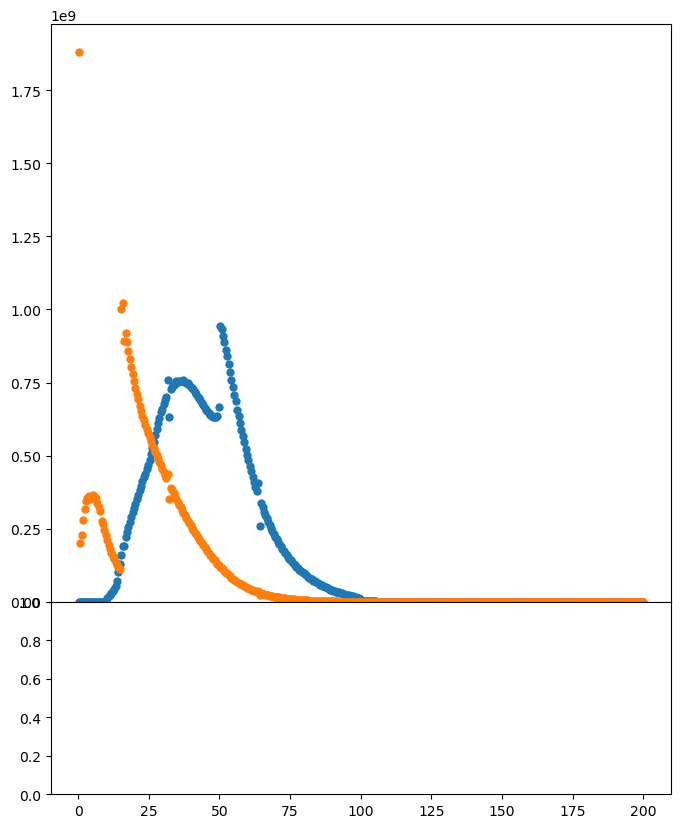

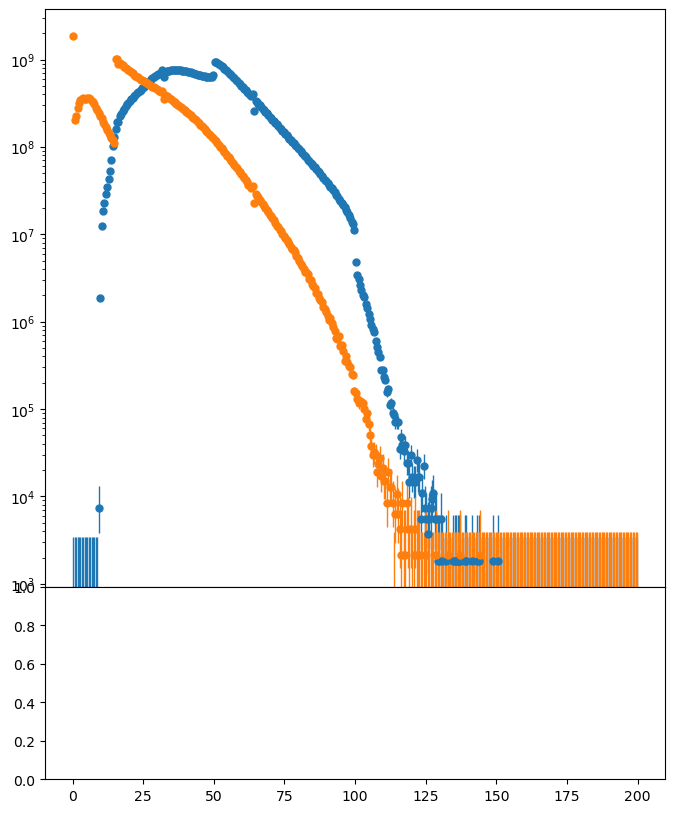

In [26]:
sXRange = "xAxisRange"; sYRange = "yAxisRange";
sXLabel = 'xAxisLabel'; sYLabel = 'yAxisLabel';
sHistosToOverlay = 'histosToOverlay'
sHistosToHadd = 'histosToHadd'
sIpFileNameNice = 'ipFileNameNice'
sHistName   = 'histogramName'

era = 2018
luminosity = 59.83
cmsWorkStatus='Work in Progress'

histograms_dict = OD([
    #("hLeadingPtGenBquark_pt_all", {sXLabel: 'Leading FatJet mass [GeV]', sYLabel: 'Events', sXRange: [0, 200]}),
    ("hLeadingPtGenBquark_pt_all", {
        sXLabel: 'Leading FatJet mass [GeV]', sYLabel: 'Events',
        sHistosToOverlay: [# [ [{histoToOverlay1}],  [{histoToOverlay2}], [{histoTohadd3p1}, {histoTohadd3p2}, ...], [{}], ...]
            [
                {sIpFileNameNice: 'analyze_hadded_QCD_HT100to200.root', sHistName: 'evt/QCD_bEnrich/hLeadingPtGenBquark_pt_all_central'},
            ],
            [
                {sIpFileNameNice: 'analyze_hadded_QCD_HT100to200.root', sHistName: 'evt/QCD_bGen/hLeadingPtGenBquark_pt_all_central'}
            ],
        ]
    }),
    
    
])

#systematics_list = ['central']

for plotNameNice in histograms_dict.keys():
    print(f"plotNameNice: {plotNameNice}")
    
    
    
    histosToOverlay = OD()
    yAxisRange = [0, 0]
    for iHistoToOverlay_details in range(len(histograms_dict[plotNameNice][sHistosToOverlay])):
        print(f"iHistoToOverlay_details: {iHistoToOverlay_details}")
        
        histosToOverlay[iHistoToOverlay_details] = None
        h_added = None
        h = []
        for iHistoToHadd in range(len(histograms_dict[plotNameNice][sHistosToOverlay][iHistoToOverlay_details])):
            
            sIpFileName_    = histograms_dict[plotNameNice][sHistosToOverlay][iHistoToOverlay_details][iHistoToHadd][sIpFileNameNice]
            fIp_            = fIpFiles[sIpFileName_]
            sHistogramName_ = histograms_dict[plotNameNice][sHistosToOverlay][iHistoToOverlay_details][iHistoToHadd][sHistName]
            h_ = fIp_[sHistogramName_]
            h1_ = h_.to_hist()
            
            print(f"\nsIpFileName_: {sIpFileName_},  sHistogramName_: {sHistogramName_}")
            '''
            print(f"h_ ({type(h_)}): {h_}")
            #print(f"h1_ ({type(h1_)}): {h1_}")
            print(f"h1_ ({type(h1_)})")
            print(f"h1_.values() ({type(h1_.values())}) ({len(h1_.values())}) {h1_.values()}")
            print(f"\nh1_.variances() ({type(h1_.variances())}) ({len(h1_.variances())}) {h1_.variances()}")
            
            print(f"h1_.view() ({type(h1_.view())}) ({len(h1_.view())}): {h1_.view()}")
            '''
            
            h.append( h1_ )
            
            #if h_added == None:
            if histosToOverlay[iHistoToOverlay_details] == None:
                #h_added = h1_
                histosToOverlay[iHistoToOverlay_details] = h1_
            else:
                #h_added = h_added + h1_
                histosToOverlay[iHistoToOverlay_details] = histosToOverlay[iHistoToOverlay_details] + h1_
                
            #print(f"\n\nh_added.view() ({type(h_added.view())}) ({len(h_added.view())}): {h_added.view()}")
            
        yMin_ = np.amin( histosToOverlay[iHistoToOverlay_details].values() - np.sqrt(histosToOverlay[iHistoToOverlay_details].variances()) )
        yMax_ = np.amin( histosToOverlay[iHistoToOverlay_details].values() + np.sqrt(histosToOverlay[iHistoToOverlay_details].variances()) )
            
        yAxisRange[0] = yMin_ if yMin_ < yAxisRange[0] else yAxisRange[0]
        yAxisRange[1] = yMax_ if yMax_ > yAxisRange[1] else yAxisRange[1]
        
            
        #print(f"\n\n list(zip(h[0].values(), h[0].variances(),  h[1].values(), h[1].variances(), h_added.values(), h_added.variances())) : { list(zip(h[0].values(), h[0].variances(),  h[1].values(), h[1].variances(), histosToOverlay[iHistoToOverlay_details].values(), histosToOverlay[iHistoToOverlay_details].variances())) } ")
        
        #h_new = h[0] + 56
        #print(f"\n\n list(zip(h[0].values(), h[0].variances(),  h[1].values(), h[1].variances(),  h_new.values(), h_new.variances())) : { list(zip(h[0].values(), h[0].variances(),  h[1].values(), h[1].variances(),  h_new.values(), h_new.variances())) } ")
        
        
        
      
    #hStack_list = [ hBkg_list[idx] for idx in idx_hBkg_sortedByIntegral ]  
    #sStack_list = [ sBkg_list[idx] for idx in idx_hBkg_sortedByIntegral ]  
    print(f"histosToOverlay.values() ({type(histosToOverlay.values())}): histosToOverlay.values()")
    print(f"list(histosToOverlay.values()) ({type(list(histosToOverlay.values()))}): list(histosToOverlay.values())")
    
    histosToOverlay_values_list = ap.array()

    for yAxisScale in ['linearY', 'logY']: #['linearY', 'logY']: # ['linearY']
        
        #fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1]}, subplot_kw={'ymargin': 0.4})
        fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,10), sharex='col', gridspec_kw={'height_ratios': [3, 1], 'hspace': 0})

        #print(f"histosToOverlay[0].axes: {histosToOverlay[0].axes}")
        #print(f"\nhistosToOverlay[0].axes[0].centers ({len(histosToOverlay[0].axes[0].centers)}): {histosToOverlay[0].axes[0].centers}")
        #print(f"\nhistosToOverlay[0].axes[0].edges ({len(histosToOverlay[0].axes[0].edges)}): {histosToOverlay[0].axes[0].edges}")
        #print(f"\n\nhistosToOverlay[0].values() ({len(histosToOverlay[0].values())}): {histosToOverlay[0].values()}")
        #hep.histplot(histosToOverlay[0].values(), bins=histosToOverlay[0].axes[0].centers, ax=ax[0], yerr=np.sqrt(histosToOverlay[0].variances()), histtype='errorbar', color='black', label='Data')
        #hep.histplot(histosToOverlay[0], ax=ax[0], yerr=np.sqrt(histosToOverlay[0].variances()), histtype='errorbar', color='black', label='Data')
        hep.histplot(list(histosToOverlay.values()), ax=ax[0], histtype='errorbar')
        #if xAxisRange: ax[0].set_xlim(xAxisRange[0], xAxisRange[1])
        #if yAxisRange: ax[0].set_ylim(yAxisRange[0], yAxisRange[1])
        #if xAxisLabel: ax[0].set_xlabel(xAxisLabel)
        #if yAxisLabel: ax[0].set_ylabel(yAxisLabel)
        
        
        if yAxisScale == 'logY': ax[0].set_yscale('log', base=10)
        


